#### В этой записной книжке мы попытаемся вместе понять и проанализировать этот набор данных супермаркета.

# Importing Necessary Libraries

In [2]:
import numpy as np
# NumPy для числовых операций

import pandas as pd
# pandas для операций с DataFrames

import seaborn as sns
# seaborn — библиотека визуализации данных

import matplotlib.pyplot as plt
# matplotlib также является библиотекой визуализации данных.

%matplotlib inline

import warnings
# игнорирование ненужных предупреждений
warnings.filterwarnings("ignore")

# Reading Data

In [3]:
df=pd.read_csv("supermarket.csv") #read_ssv -> функция для читабельности нашего датафрейма
# чтение данных с помощью панд

# EDA

In [4]:
df.head()
# он показывает первые 5 строк

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()
#показывает последние 5 строк

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.info()
#Показывает общую информацию о столбцах.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()
#Показывает, есть ли какие-либо пропущенные значения в нашем наборе данных

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.sample(10)
# случайные 10 строк в наборе данных

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
509,602-80-9671,C,Naypyitaw,Member,Female,Home and lifestyle,15.95,6,4.7850,100.4850,2/9/2019,17:15,Credit card,95.70,4.761905,4.7850,5.1
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.3700,469.7700,3/30/2019,10:18,Cash,447.40,4.761905,22.3700,7.4
82,480-63-2856,C,Naypyitaw,Normal,Male,Food and beverages,19.25,8,7.7000,161.7000,1/23/2019,18:37,Ewallet,154.00,4.761905,7.7000,6.6
861,840-76-5966,A,Yangon,Member,Male,Sports and travel,12.76,2,1.2760,26.7960,1/8/2019,18:06,Ewallet,25.52,4.761905,1.2760,7.8
319,787-15-1757,C,Naypyitaw,Member,Male,Health and beauty,44.07,4,8.8140,185.0940,2/18/2019,16:28,Ewallet,176.28,4.761905,8.8140,8.4
596,152-68-2907,A,Yangon,Normal,Male,Food and beverages,52.20,3,7.8300,164.4300,2/15/2019,13:30,Credit card,156.60,4.761905,7.8300,9.5
769,886-54-6089,A,Yangon,Normal,Female,Home and lifestyle,11.43,6,3.4290,72.0090,1/15/2019,17:24,Cash,68.58,4.761905,3.4290,7.7
877,608-05-3804,B,Mandalay,Member,Male,Electronic accessories,39.75,1,1.9875,41.7375,2/25/2019,20:19,Cash,39.75,4.761905,1.9875,6.1
116,291-32-1427,B,Mandalay,Member,Male,Fashion accessories,21.94,5,5.4850,115.1850,3/5/2019,12:29,Ewallet,109.70,4.761905,5.4850,5.3
932,243-55-8457,A,Yangon,Normal,Female,Food and beverages,74.44,10,37.2200,781.6200,2/27/2019,11:40,Ewallet,744.40,4.761905,37.2200,5.1


# Глубокое понимание

In [9]:
df["City"].unique()
#уникальные значения столбца Город

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
df.Branch.nunique()
#количество уникальных значений столбца Branch

3

In [11]:
df.Branch.unique()
#уникальные значения столбца Город

array(['A', 'C', 'B'], dtype=object)

In [12]:
df.Total.max()
#Максимальная цена штекера


1042.65

In [13]:
df.Total.max(),df.Total.min(),df.Total.std(),df.Total.var(),df.Total.mean(),df.Total.mode()

#Много статистических значений
# Максимум, Минимум, Стандартное отклонение, Дисперсия, Среднее и Мода соответственно

(1042.65,
 10.6785,
 245.88533510097207,
 60459.598017717326,
 322.96674900000005,
 0     87.2340
 1     93.7440
 2    175.9170
 3    189.0945
 4    216.8460
 5    217.6335
 6    263.9700
 7    276.9480
 8    470.9880
 9    829.0800
 Name: Total, dtype: float64)

In [14]:
df.describe()
#Показывает статистические значения столбцов типа int или float

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [15]:
df.describe(include="O")
#Показывает статистические значения столбцов объектного типа

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


# Работа с датами

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [17]:
df["Date"]=pd.to_datetime(df["Date"])
#Я преобразовал тип столбца Date в DateTime из объекта

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [19]:
df["day"]=(df["Date"]).dt.day
# Я создаю новый столбец, его имя — день, а затем я извлекаю дни из столбца «Дата».

df["month"]=(df["Date"]).dt.month
# Я создаю новый столбец, его имя — месяц, а затем я извлекаю месяцы из столбца «Дата».

df["year"]=(df["Date"]).dt.year
# Я создаю новый столбец, его имя — год, а затем я извлекаю годы из столбца «Дата».

df["month_name"]=(df["Date"]).dt.month_name()
# Я создаю новый столбец, его имя — month_name, а затем я извлекаю названия месяцев из столбца «Дата».

df["weekday"]=(df["Date"]).dt.day_name()
# Я создаю новый столбец, его имя — день недели, а затем я извлекаю день недели из столбца «Дата».


In [20]:
#Давайте посмотрим на наш фрейм данных!
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday


In [21]:
# Мы не смогли увидеть все столбцы, поэтому я установлю опцию.
pd.set_option("display.max_columns",25)
# покажи мне 25 колонок, если больше 25 поставь ...

In [22]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [24]:
df["Time"]=pd.to_datetime(df["Time"])
#Я преобразовал тип столбца Time в DateTime из объекта

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [26]:
df["Hour"]=(df["Time"]).dt.hour
# Я создаю новый столбец с именем «Час», а затем извлекаю информацию о часах из столбца «Время».

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-12-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-12-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-12-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-12-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-12-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday,10


# Визуализация данных

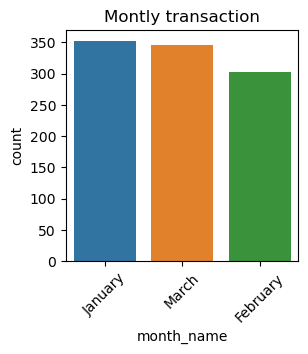

In [32]:
plt.figure(figsize=(3,3))
#устанавливаем размер фигуры как (8,8). Это означает 8 по оси x и 6 по оси y.

plt.title("Montly transaction")
#установка заголовка графика

sns.countplot(x=df.month_name)
#Создание графика подсчета месяцев

plt.xticks(rotation=45); 
#установка угла поворота названия месяца

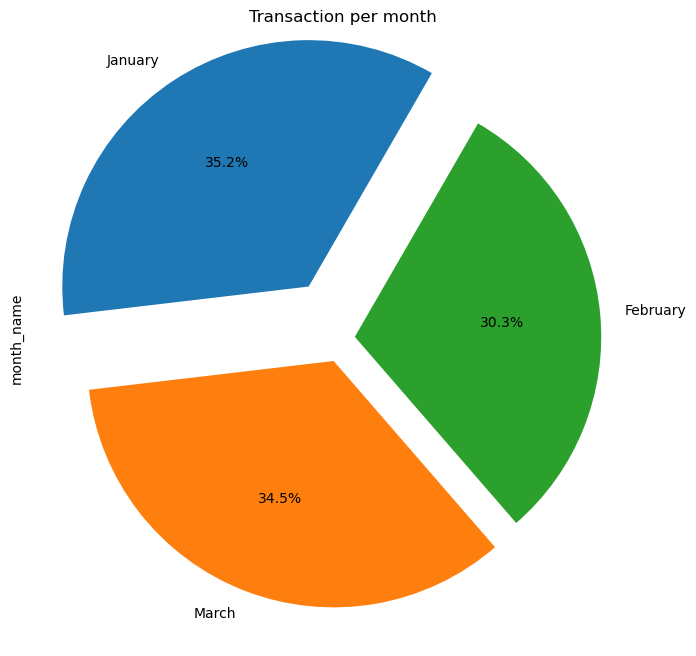

In [30]:
plt.figure(figsize=(8,8))
# В круговой диаграмме мы делаем квадрат. Как следствие, я сделал этот размер (8,8).

explode=(0.25,0.10,0.05)
# Взрыв помогает нам видеть более четко.
# Я взорвал первое больше, а третье меньше.

df["month_name"].value_counts().plot.pie(autopct="%1.1f%%",startangle=60,explode=explode)
#Составляем круговую диаграмму.
#начиная с 60 градусов до проставления значений.

plt.title("Transaction per month");

> **Как мы видим, в январе в этом супермаркете было больше покупателей, чем в предыдущие два месяца.**

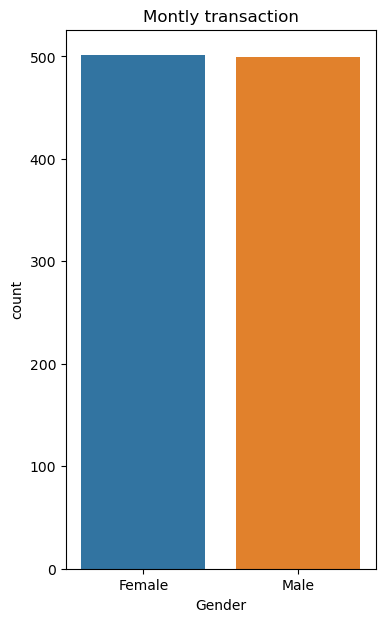

In [33]:
plt.figure(figsize=(4,7))

plt.title("Montly transaction")

sns.countplot(x=df["Gender"]);
# Создание графика подсчета столбца «Пол».

> **Существует очень небольшой интервал между мужским и женским родом**

**Посмотрим, сколько отличий!**

In [30]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

***Всего 2 человека***

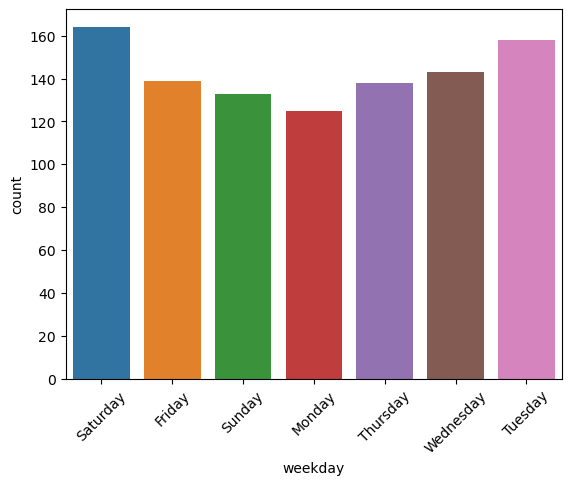

In [32]:
sns.countplot(x=df.weekday)
plt.xticks(rotation=45);
#поворот значений по оси X

> **Самый многолюдный день — суббота. Наверное, так как это праздник любого человека, и многие люди покупают свои нужды на неделю в субботу.**

> **Однако понедельник — самый спокойный день. Интересно, что вторник — второй по посещаемости день. Во вторник народу еще больше, чем в воскресенье. Почему?**

> **Возможно, продукты, купленные в субботу, заканчиваются.**

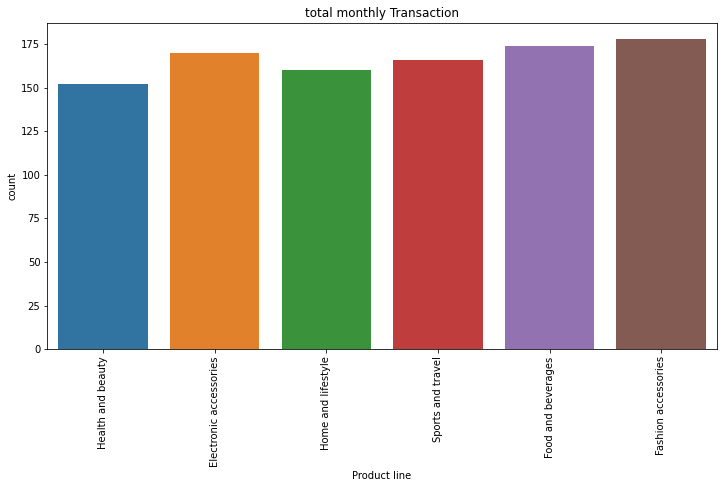

In [32]:
plt.figure(figsize=(12,6))
plt.title("total monthly Transaction")
sns.countplot(x=df["Product line"])
plt.xticks(rotation=90); 

## Давайте посмотрим на круговую диаграмму!

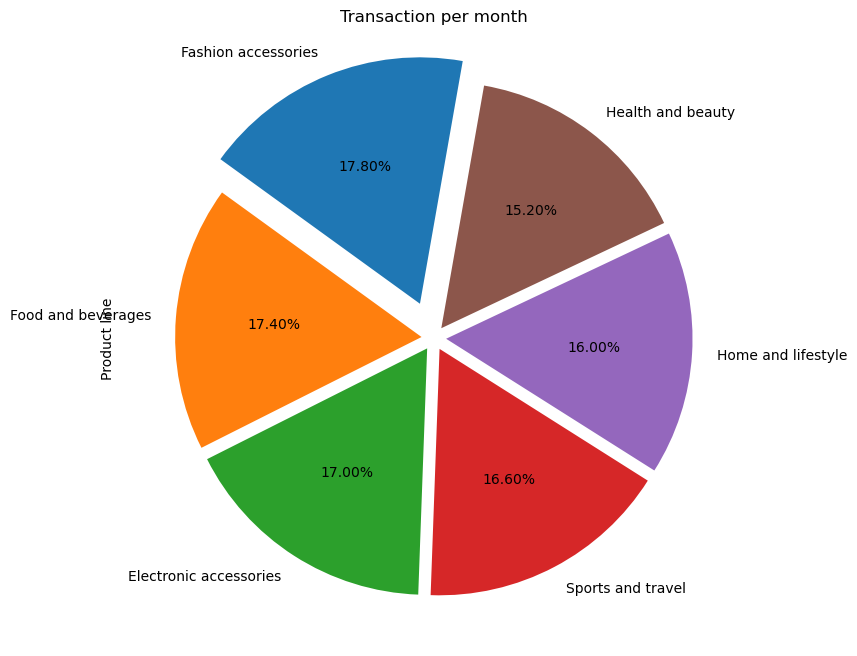

In [33]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode)
#  autopct="%1xf%%" 
#Это означает показать число "x" после запятой.

plt.title("Transaction per month");


> **Вау Модные аксессуары больше, чем другие, даже больше, чем еда :D .**

> **Возможно, нам стоит взглянуть на график с точки зрения пола.**

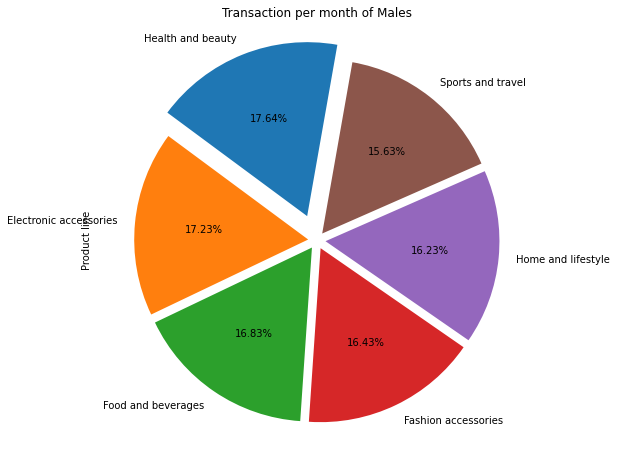

In [34]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"][df["Gender"]=="Male"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Males");


## **На этом графике показана единственная мужская транзакция в месяц.**
> **Теперь график изменился. Модные аксессуары переместились с первого места на четвертое. И сейчас на первом месте Здоровье и Красота. Кто сказал, что мужчины не заботятся о своей красоте? Я шучу, такой вывод сделать нельзя. Может быть, они купили его для своих подруг или мам. Кто знает?**


> **Размещение электронных аксессуаров рядом с аксессуарами для здоровья и красоты может увеличить продажи в супермаркетах!**

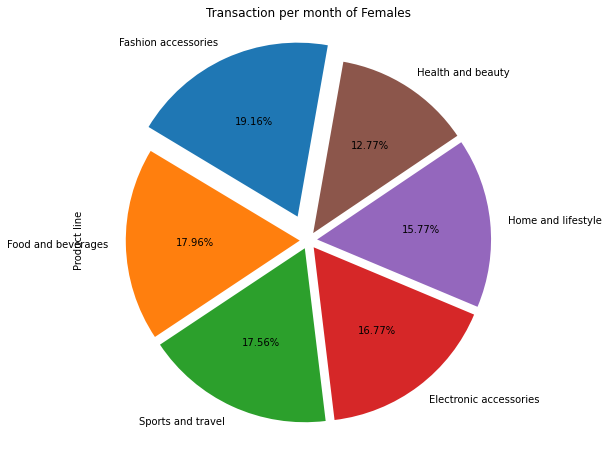

In [35]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"][df["Gender"]=="Female"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Females");


## **На этом графике показана единственная транзакция женского пола в месяц.**
> **Как мы и ожидали, модные аксессуары с большим отрывом впереди.**

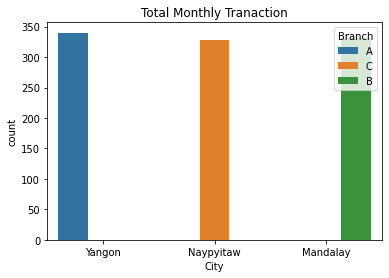

In [36]:
plt.title("Total Monthly Tranaction")
sns.countplot(x=df["City"],hue = df["Branch"]);

> Большинство клиентов из города Янгон.

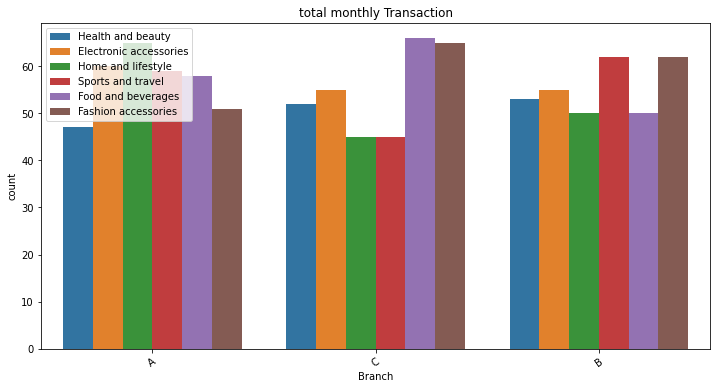

In [37]:
plt.figure(figsize=(12,6))
plt.title("total monthly Transaction")
sns.countplot(x=df["Branch"],hue=df["Product line"])
plt.xticks(rotation=35)
plt.legend(loc="best"); 
plt.show()

> Как видите, популярность и потребности могут меняться в зависимости от местоположения.

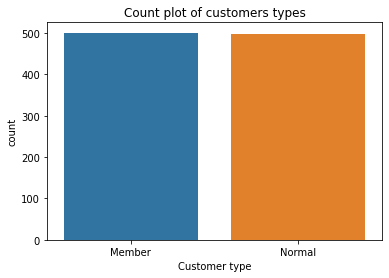

In [38]:
plt.title("Countplot of customers types")
sns.countplot(x=df["Customer type" ]);

- Это почти равные

In [39]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

- Различий всего 2 человека

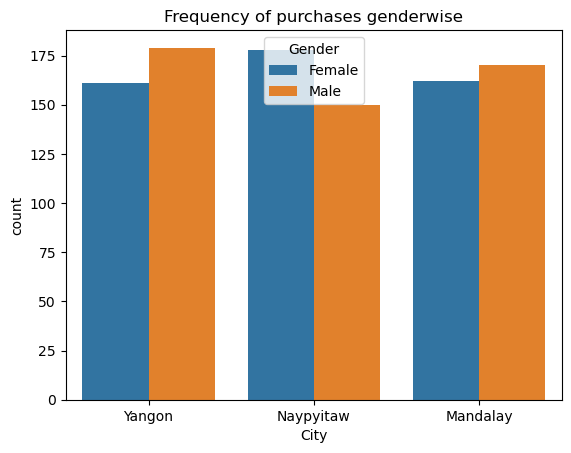

In [34]:
plt.title("Frequency of purchases genderwise")
sns.countplot(x=df.City,hue=df.Gender);
#Genders с точки зрения городов

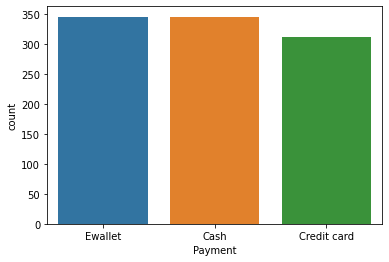

In [41]:
sns.countplot(x=df.Payment);

> **Кредитная карта дешевле других**

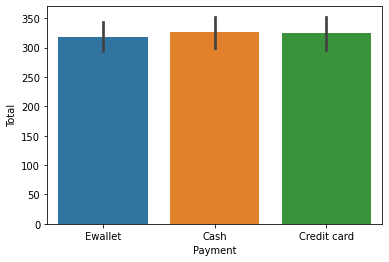

In [42]:
sns.barplot(x=df.Payment,y=df["Total"]);

> **Я ожидал увидеть более высокие кредитные карты и электронные кошельки, когда общая сумма увеличится, но это не так. Таким образом, мы не должны забывать, что эти данные были в начале 2019 года, поэтому мы должны думать об этой дате, а не сегодня. **

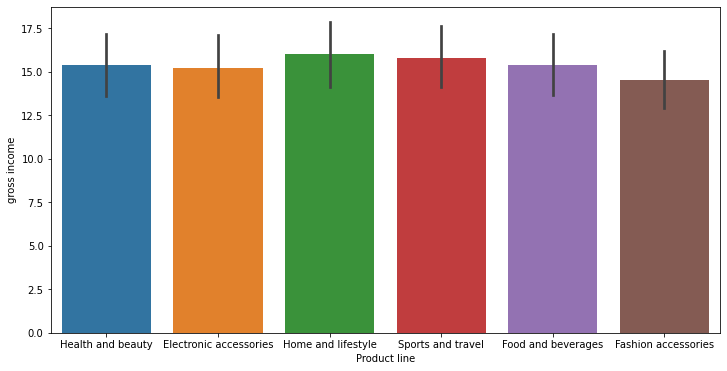

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Product line"],y=df["gross income"]);

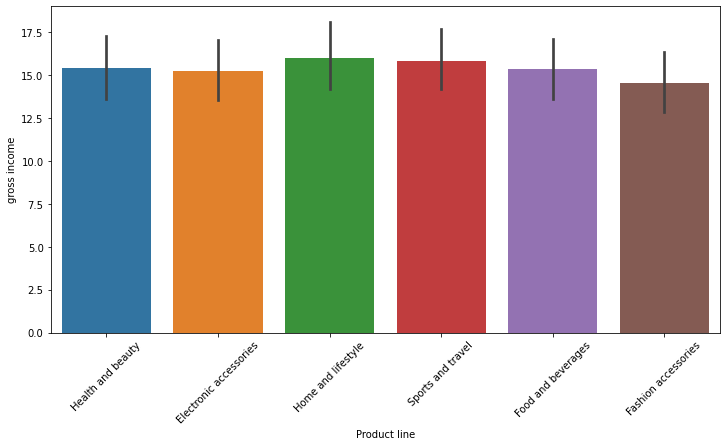

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Product line"],y=df["gross income"])
plt.xticks(rotation=45);

> **Валовой доход от дома и образа жизни больше, чем у других.**

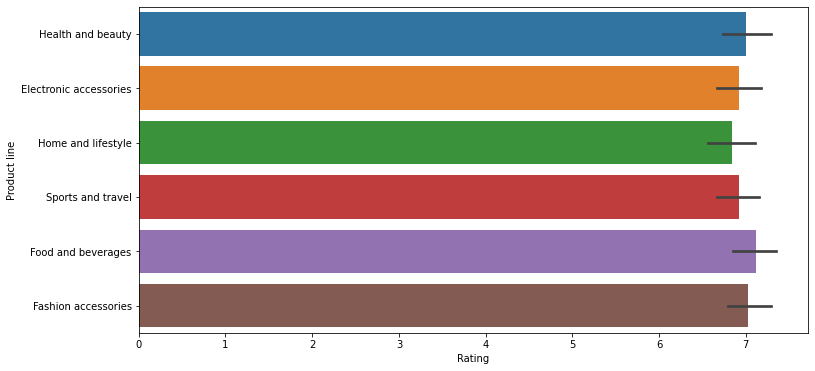

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y=df["Product line"],x=df["Rating"]);

> **Нет большой разницы между рейтингом и аксессуарами, я думаю, что мы больше ничего не можем сказать об этом графике**

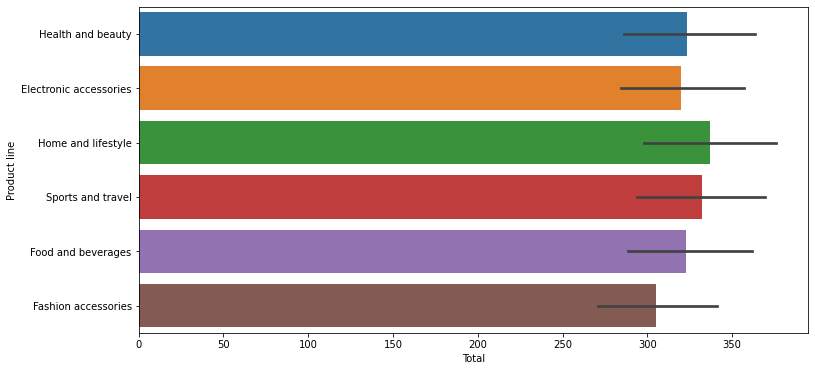

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Total"],y=df["Product line"]);

> Мы можем сказать, что, возможно, товары для дома и образа жизни дороже, чем другие, или когда люди покупают эти товары, количество товаров больше, чем у других. Напротив, мы не можем найти, что верно

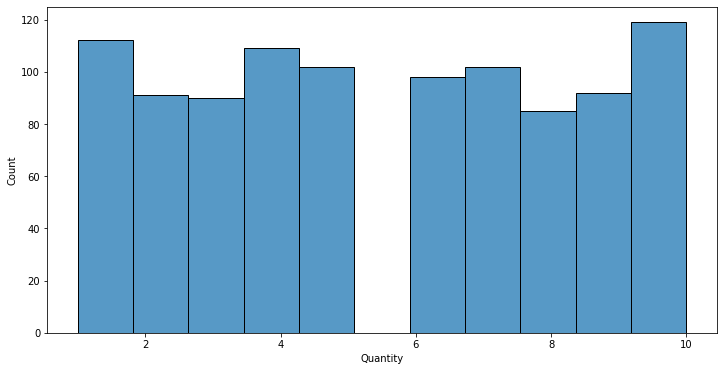

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df["Quantity"]);

> Количества распределены почти поровну.

## Корреляция

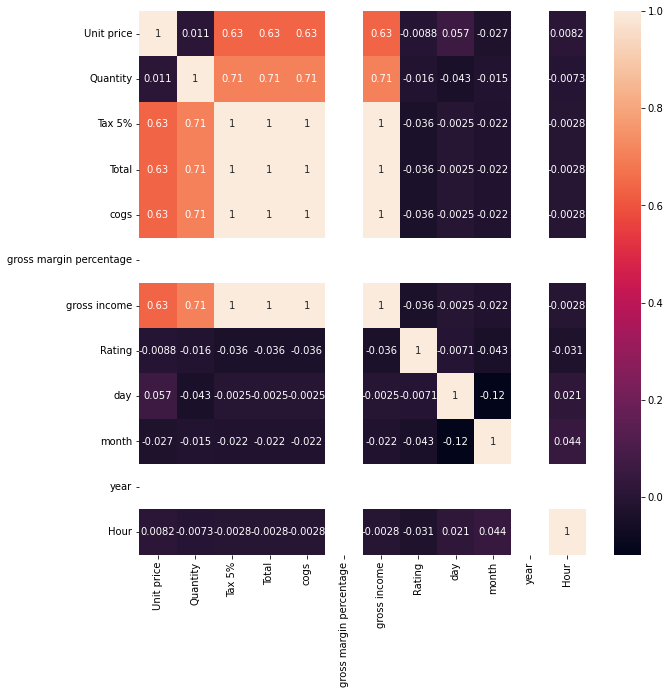

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

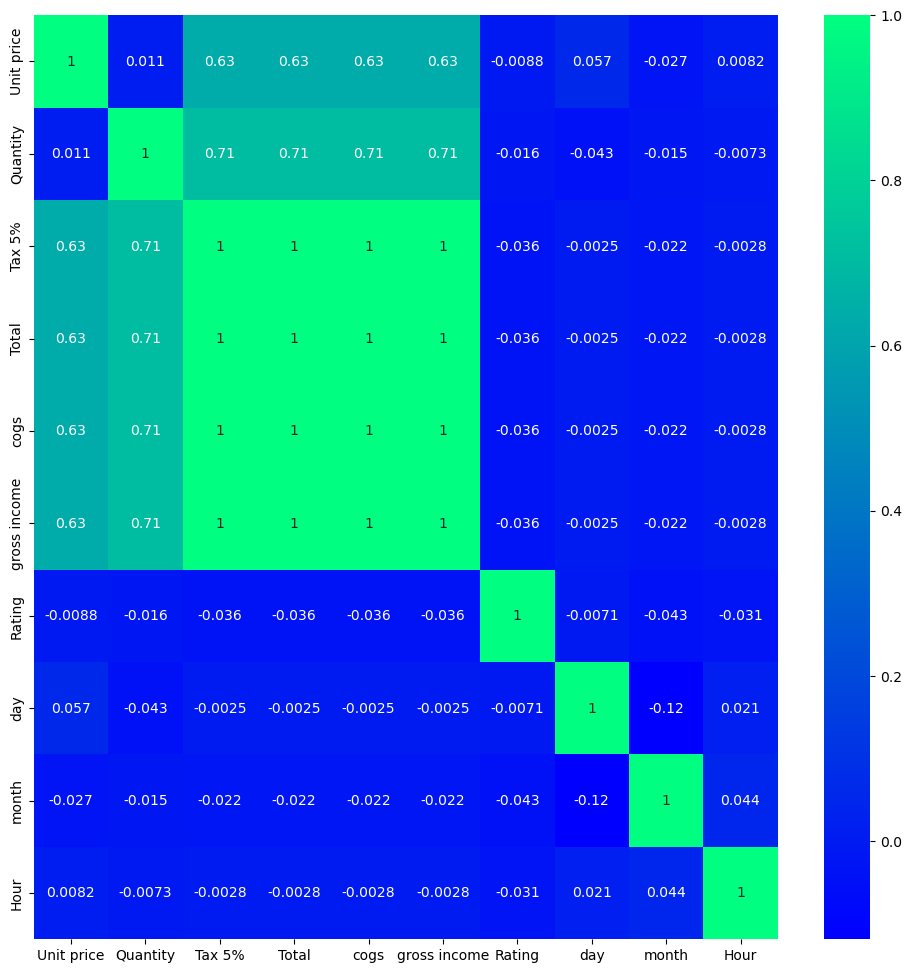

In [35]:
#Чтобы лучше видеть, я уберу столбцы NaN.
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(["gross margin percentage","year"],axis=1).corr(),annot=True,cmap="winter");